# Lista de exercício_02

## Questão 1
- Gere manualmente ("no braço") um dataset (array) com 10 elementos inteiros, tendo como média o valor 3 e como desvio padrão um valor próximo de 2. 
- Desenhe o histograma para os dados gerados.

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import linear_model

X1 = np.array([5, 4, 6, 3, 1, 0, 2, 0, 4, 5])
np.mean(X1), np.std(X1), np.sum(X1)

(3.0, 2.04939015319192, 30)

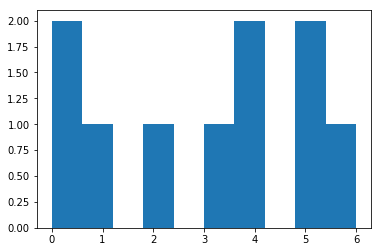

In [27]:
plt.hist(X1);

## Questão 2
- Gere dados randômicos e desenhe o histograma para uma distribuição normal contendo 5000 pontos, que tem como média o valor 60 e como desvio padrão o valor 10.

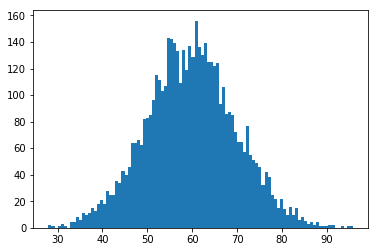

In [5]:
X2 = np.random.normal(size=5000, scale=10, loc=60)
plt.hist(X2, bins=100);

## Questão 3
- Gere dados randômicos e desenhe o histograma para 2 distribuições escolhidas por você (exceto a dist. normal/gaussiana) a partir da figura a seguir:  
![](img/distribution.png)

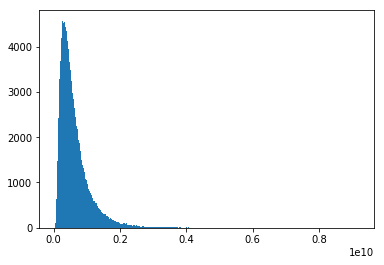

In [73]:
log_normal = np.random.lognormal(mean=20, sigma=0.7, size=100000)
plt.hist(log_normal, bins=300);

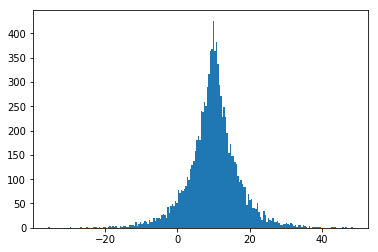

In [56]:
laplace = np.random.laplace(loc=10, scale=5, size=10000)
plt.hist(laplace, bins=200);

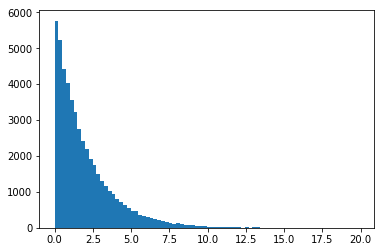

In [76]:
exponential = np.random.exponential(scale=2, size=50000)
plt.hist(exponential, bins=80);

## Questão 4
- **Altere os parâmetros do Gradiente Descendente do [notebook 04-Gradiente Descendente.ipynb](https://github.com/regispires/aulas-machine-learning/blob/master/04-Gradiente%20Descendente.ipynb), para que a diferença entre o valor da métrica de erro do Gradiente Descendente e o valor da métrica de erro da Regressão Linear do Scikit Learn seja menor do que 0.01. Obtenha os coeficientes da regressão linear e o valor do erro. Dica: aumentar muito o número de iterações do Gradiente Descendente.**

 - R: Modifiquei o valor da variável **num_iterations** para 1000000, para satisfazer a condição de que a diferença entre os erros calculados das duas maneiras ficasse menor do que 0.01.

 - **O que ocorre quando você aumenta o valor de learning_rate para 0.01?**
   - R: Apresenta um aviso(warning) onde aparentemente ocorre ou ocorrerá um estouro(overflow) na memória. O processo continua a executar mesmo assim, porém o **erro:** fica como **nam**
 
 - **Que valores de parâmetros podem ser usados com sucesso para obter um valor satisfatório para a métrica de erro ao usar um valor de learning_rate igual a 0.01?**
   - **Os parâmetros deve ser tais que nenhum warning deve ocorrer durante a execução do gradiente descendente.**
 - R: Testando valor a valor, definindo o valor do **num_iterations** com qualquer valor maior que 0 e menor que 90 não será lançada nenhum aviso(warning).

## Implementa o gradiente descendente

### Erro

$$ Error_{\beta_0, \beta_1} = \frac{1}{N} \sum_{i=1}^{N}{(y_i - (\beta_1 x_i + \beta_0))^2}  $$

### Derivada Parcial

$$ \frac{\partial}{\partial \beta_1} = \frac{2}{N} \sum_{i=1}^{N} -x_i(y_i-(\beta_1x_i + \beta_0))  $$

$$ \frac{\partial}{\partial \beta_0} = \frac{2}{N} \sum_{i=1}^{N} -(y_i-(\beta_1x_i + \beta_0))  $$


In [6]:
# y = b0 + b1 * x
# b1 é a inclinação, b0 é y-intercept
def compute_error_for_line_given_points(b0, b1, x, y):
    totalError = np.sum((y - (b1 * x + b0)) ** 2)
    return totalError / float(len(y))

def step_gradient(b0_current, b1_current, x, y, learning_rate):
    N = float(len(y))
    b0_gradient = 2/N * np.sum(-(y - ((b1_current * x) + b0_current)))
    b1_gradient = 2/N * np.sum(-x * (y - ((b1_current * x) + b0_current)))
    new_b0 = b0_current - (learning_rate * b0_gradient)
    new_b1 = b1_current - (learning_rate * b1_gradient)
    return new_b0, new_b1

def gradient_descent_runner(x, y, b0, b1, learning_rate, num_iterations):
    for _ in range(num_iterations):
        b0, b1 = step_gradient(b0, b1, x, y, learning_rate)
    return b0, b1

def run(x, y, initial_b0, initial_b1, learning_rate, num_iterations):
    print("Inicia com b0 = {}, b1 = {}, error = {}".format(initial_b0, initial_b1, compute_error_for_line_given_points(initial_b0, initial_b1, x, y)))  
    print("Executando...")
    b0, b1 = gradient_descent_runner(x, y, initial_b0, initial_b1, learning_rate, num_iterations)
    print("Após {} iterações, obtemos b0 = {}, b1 = {}, error = {}".format(num_iterations, b0, b1, compute_error_for_line_given_points(b0, b1, x, y)))

## Carrega dados

In [7]:
# points = np.array([[1, 1], [2, 3], [4, 3], [3, 2], [5, 5]])
points = np.genfromtxt("data.csv", delimiter=",")

## Define parâmetros e executa

In [20]:
%%time
x = points[:, 0]
y = points[:, 1]
learning_rate = 0.0001
initial_b0 = 0 # y-intercept inicial
initial_b1 = 0 # inclinação inicial
num_iterations = 1000000
run(x, y, initial_b0, initial_b1, learning_rate, num_iterations)

Inicia com b0 = 0, b1 = 0, error = 5565.107834483214
Executando...
Após 1000000 iterações, obtemos b0 = 7.986822773189424, b1 = 1.3225135372757006, error = 110.25738413161345
CPU times: user 2min 12s, sys: 40 ms, total: 2min 12s
Wall time: 2min 13s


## Resultado usando scikit learn

In [12]:
%%time
model = linear_model.LinearRegression()
X = [ [i] for i in x ] 
model.fit(X, y)
b0, b1 = model.intercept_, model.coef_
y_pred = model.predict(X)
print("b0 = {}, b1 = {}, error = {}".format(b0, b1, compute_error_for_line_given_points(b0, b1, x, y)))

b0 = 7.991020982270399, b1 = [1.32243102], error = 110.25738346621316
CPU times: user 8 ms, sys: 0 ns, total: 8 ms
Wall time: 3.12 ms


## Re-iteração com learning_rate = 0.01 e 0 < num_itarations < 90

In [104]:
%%time
x = points[:, 0]
y = points[:, 1]
learning_rate = 0.01
initial_b0 = 0 # y-intercept inicial
initial_b1 = 0 # inclinação inicial
num_iterations = 89
run(x, y, initial_b0, initial_b1, learning_rate, num_iterations)

Inicia com b0 = 0, b1 = 0, error = 5565.107834483214
Executando...
Após 89 iterações, obtemos b0 = 5.797395039524365e+148, b1 = 2.9496234602465667e+150, error = 2.1688803463679651e+304
CPU times: user 16 ms, sys: 0 ns, total: 16 ms
Wall time: 13.5 ms


## Questão 5
 - Use o gradiente descendente com boa precisão para:
   - Criar um modelo linear a partir dos seguintes dados:
   ![](img/historical-housing-data.png)
   - Predizer o preço em Dólares de uma casa com área de 100 m2 (converta adequadamente as unidades de medida).

### Item 1 - Criar Modelo Linear

In [107]:
X = np.array([[1400],[1600],[1700],[1875],[1100],[1550],[2350],[2450],[1425],[1700]])
X

array([[1400],
       [1600],
       [1700],
       [1875],
       [1100],
       [1550],
       [2350],
       [2450],
       [1425],
       [1700]])

In [127]:
y = np.array([245000,312000,279000,308000,199000,219000,405000,324000,319000,255000])
y

array([245000, 312000, 279000, 308000, 199000, 219000, 405000, 324000,
       319000, 255000])

### Estrutura do linear_model

In [128]:
model = linear_model.LinearRegression()
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### b1

In [131]:
b1 = model.coef_
b1

array([109.76773783])

#### B0

In [130]:
b0 = model.intercept_
b0

98248.32962138092

#### y_pred

In [132]:
y_pred = model.predict(X)
y_pred

array([251923.16258352, 273876.71014954, 284853.48393255, 304062.83805282,
       218992.84123449, 268388.32325803, 356202.51352211, 367179.28730512,
       254667.35602927, 284853.48393255])

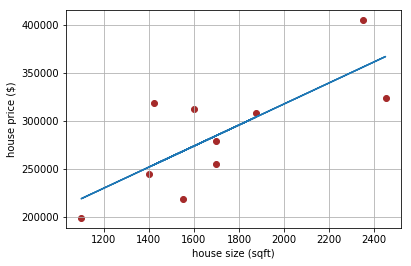

In [142]:
plt.grid()
plt.scatter(X, y, color='brown')
plt.xlabel('house size (sqft)')
plt.ylabel('house price ($)')
plt.plot(X, y_pred);

### Item 2 - Predizer preço de casa 

#### 100m² -> 1076.39

In [136]:
novoValor = np.array([[1076.39]])
novoValor_pred = model.predict(novoValor)
novoValor_pred

array([216401.22494432])

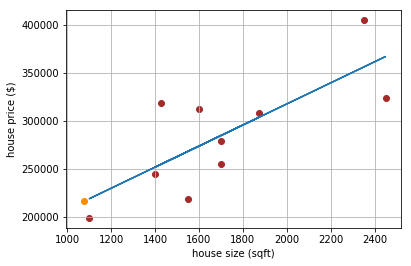

In [141]:
plt.grid()
plt.scatter(X, y, color='brown')
plt.scatter(novoValor, novoValor_pred, color='darkorange')
plt.xlabel('house size (sqft)')
plt.ylabel('house price ($)')
plt.plot(X, y_pred);